In [1]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery, DLRawTriggerReader
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.core.traits import List

from ctapipe.core import QualityQuery

from pathlib import Path

# As default gets the whole r0 waveform

In [2]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          sequence_length = 6,
                          trigger_settings ={"cpe_threshold":0},
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          #output_settings= "waveform",
                          allowed_tels = [1],
                          quality_cuts = False)

In [3]:
reader.example_identifiers


<Table length=11044>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1
    5          0           5 ...  -0.8830110313976508                         1
    6          0           6 ...  -0.8830110313976508                         1
    7          0           7 ...   -1.481803772036002                         1
    8          0           8 ...   -1.481803772036002                         1
  ...        ...         ... ...                  ...                       ...
11035          0       11035 ...  -1.0322380973735295                         1
11036          0       11036 ...  -2.2933470950976123                         1
11037          0       11037 ...  -1.7009575415831506                         1
11038          0       11038 ...  -1.7009575415831506                         1
11039          0       11039 ...  -1.3769667552339369                         1
11040          0       11040 ...  -1.3769667552339369                         1
11041          0       11041 ...  -0.8095704438545192                         1
11042          0       11042 ...  -0.8095704438545192                         1
11043          0       11043 ...   -0.869229201033562                         1

In [4]:
reader._get_n_events()

11044

In [5]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6,7,8])

<Table length=9>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1
    5          0           5 ...  -0.8830110313976508                         1
    6          0           6 ...  -0.8830110313976508                         1
    7          0           7 ...   -1.481803772036002                         1
    8          0           8 ...   -1.481803772036002                         1

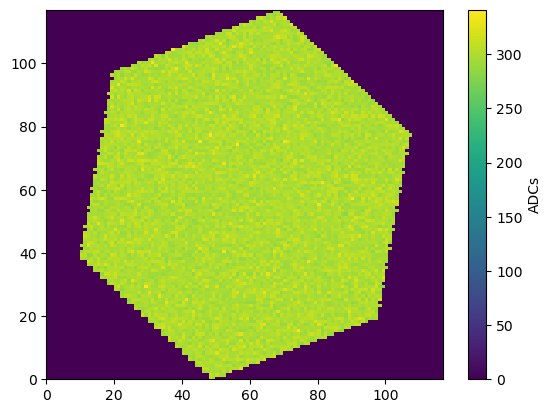

In [6]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['waveform'][2]
plt.figure()
plt.pcolor(waveform[:,:,5],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

# One random patch (0.5 prob p.e. < nsb_threshold)

In [7]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0},
                          sequence_length = 75,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [8]:
reader.example_identifiers

<Table length=11044>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1
    5          0           5 ...  -0.8830110313976508                         1
    6          0           6 ...  -0.8830110313976508                         1
    7          0           7 ...   -1.481803772036002                         1
    8          0           8 ...   -1.481803772036002                         1
  ...        ...         ... ...                  ...                       ...
11035          0       11035 ...  -1.0322380973735295                         1
11036          0       11036 ...  -2.2933470950976123                         1
11037          0       11037 ...  -1.7009575415831506                         1
11038          0       11038 ...  -1.7009575415831506                         1
11039          0       11039 ...  -1.3769667552339369                         1
11040          0       11040 ...  -1.3769667552339369                         1
11041          0       11041 ...  -0.8095704438545192                         1
11042          0       11042 ...  -0.8095704438545192                         1
11043          0       11043 ...   -0.869229201033562                         1

In [9]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5,6])


<Table length=7>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1
    5          0           5 ...  -0.8830110313976508                         1
    6          0           6 ...  -0.8830110313976508                         1

cherenkov_pe
------------
           0
           0
           0
          44


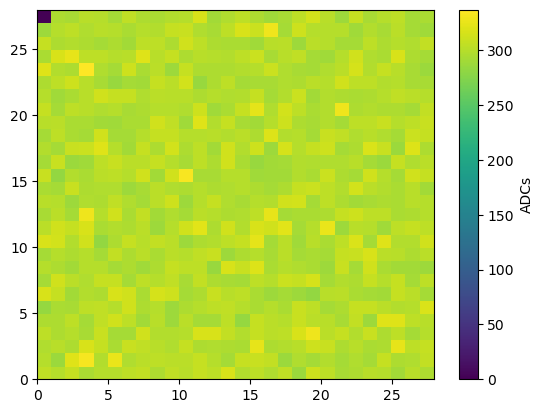

In [10]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "random_patch",
                          trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0},
                          sequence_length = 75,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)
batch = reader.generate_mono_batch(batch_indices=[0,1,2,3])
print(batch['cherenkov_pe'])
waveform = batch['waveform'][0]

plt.figure()
plt.pcolor(waveform[:,:,15],cmap='viridis')
plt.colorbar(label="ADCs")
plt.show()
plt.close()

# Taking the hot patch

In [11]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          output_settings = "hot_patch",
                          hot_pixel_from_simulation = True,
                          trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0},
                          sequence_length = 75,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)

In [12]:
reader.example_identifiers

<Table length=11044>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1
    5          0           5 ...  -0.8830110313976508                         1
    6          0           6 ...  -0.8830110313976508                         1
    7          0           7 ...   -1.481803772036002                         1
    8          0           8 ...   -1.481803772036002                         1
  ...        ...         ... ...                  ...                       ...
11035          0       11035 ...  -1.0322380973735295                         1
11036          0       11036 ...  -2.2933470950976123                         1
11037          0       11037 ...  -1.7009575415831506                         1
11038          0       11038 ...  -1.7009575415831506                         1
11039          0       11039 ...  -1.3769667552339369                         1
11040          0       11040 ...  -1.3769667552339369                         1
11041          0       11041 ...  -0.8095704438545192                         1
11042          0       11042 ...  -0.8095704438545192                         1
11043          0       11043 ...   -0.869229201033562                         1

In [13]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4])

<Table length=5>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           1 ...  -1.4897898175306203                         1
    2          0           2 ... -0.42745453697254265                         1
    3          0           3 ...   -1.800087774779224                         1
    4          0           4 ...   -1.800087774779224                         1

In [14]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['waveform'][1]

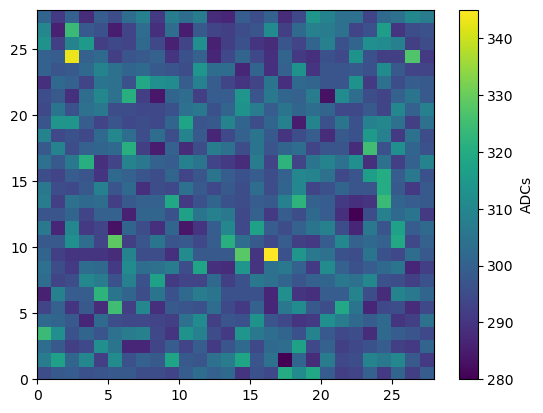

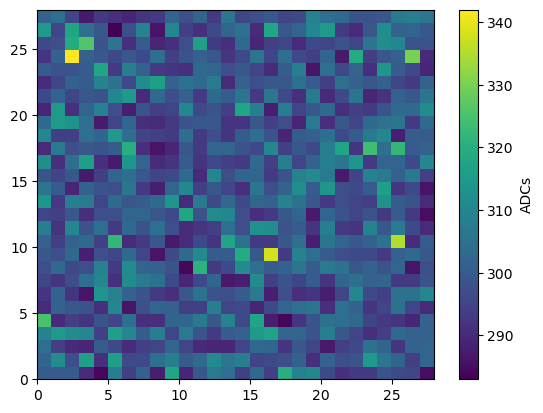

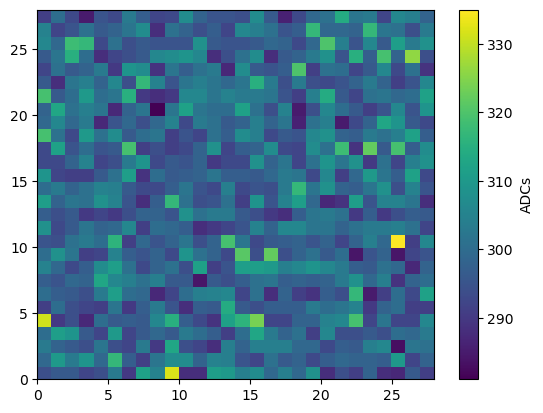

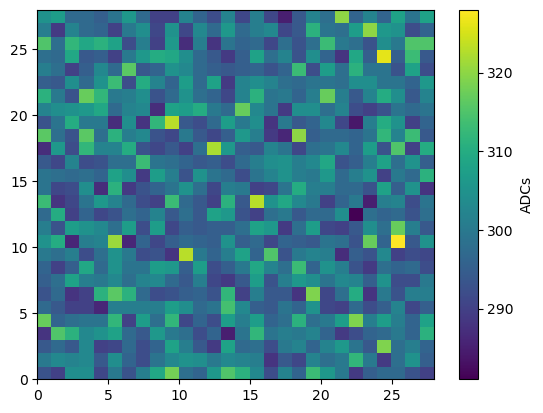

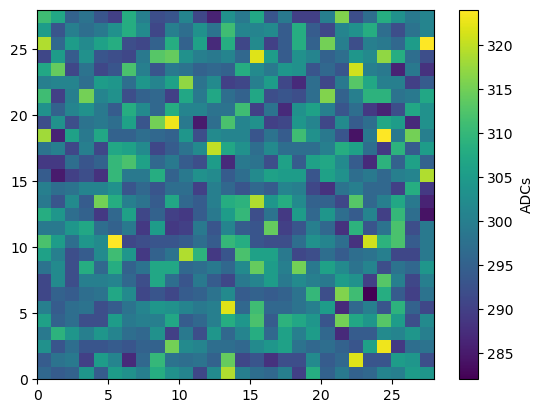

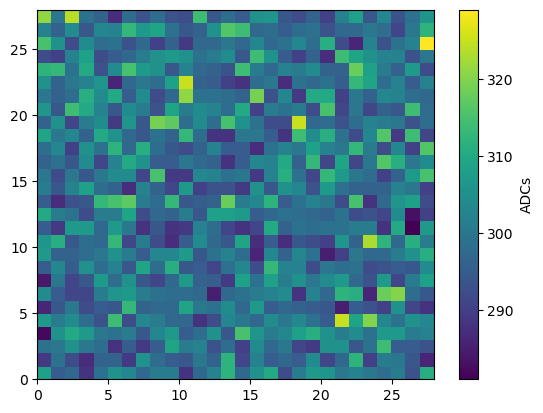

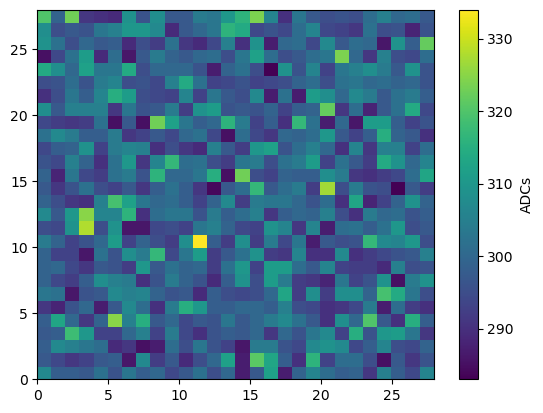

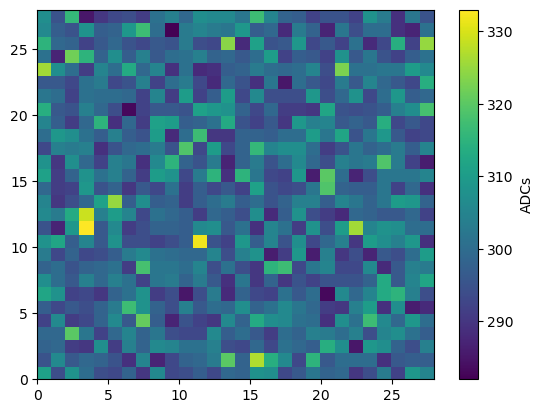

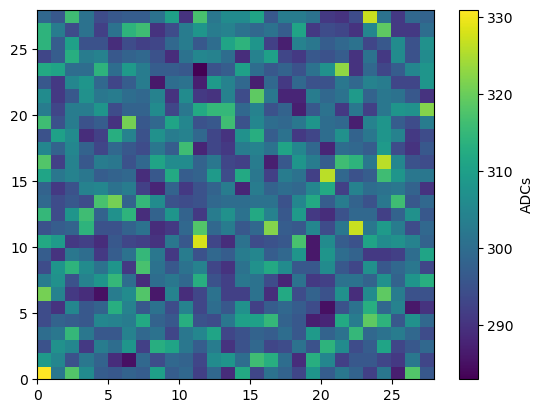

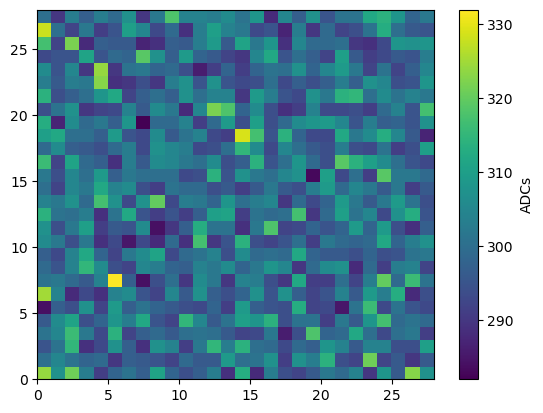

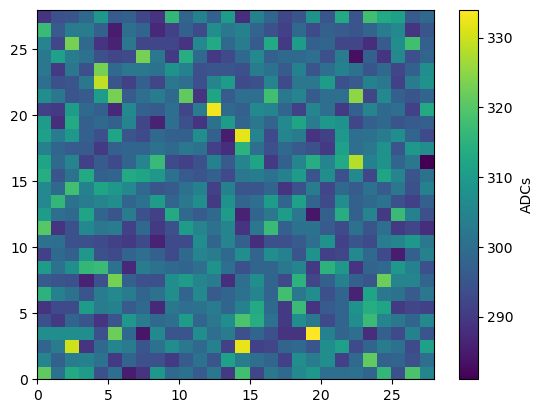

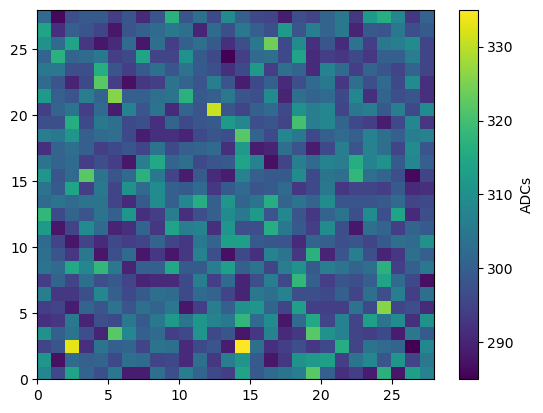

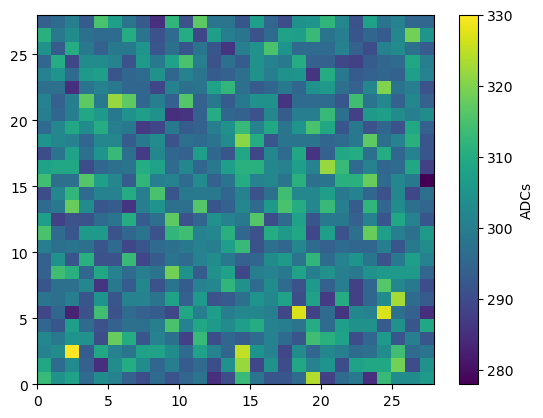

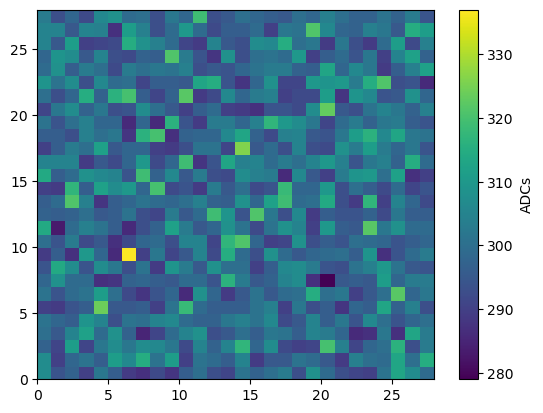

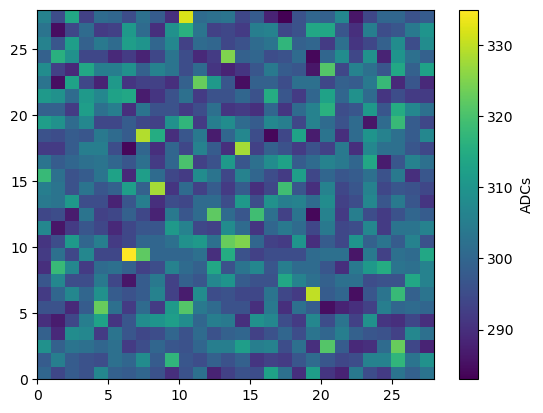

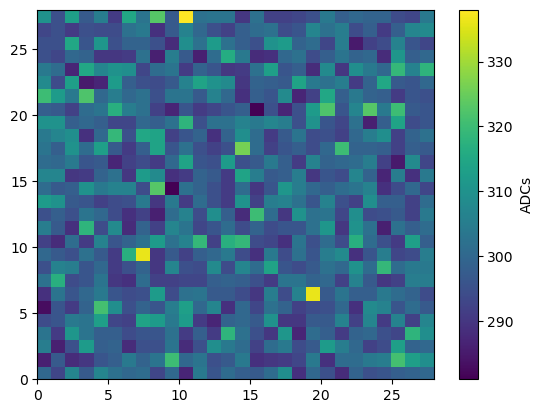

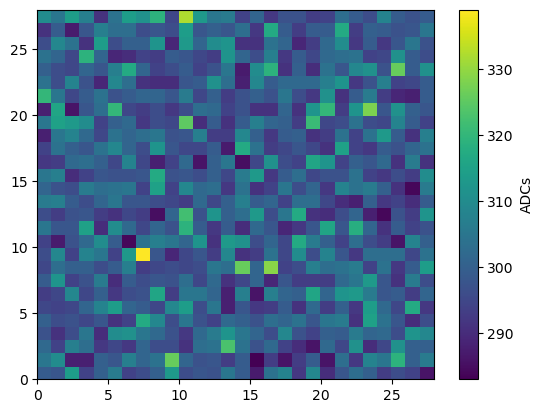

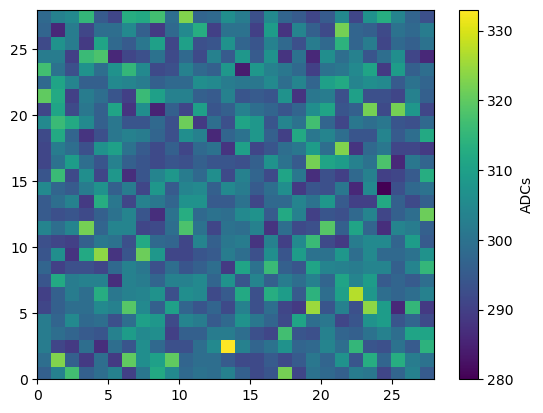

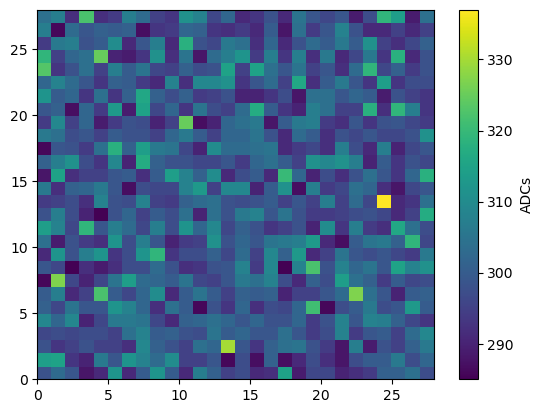

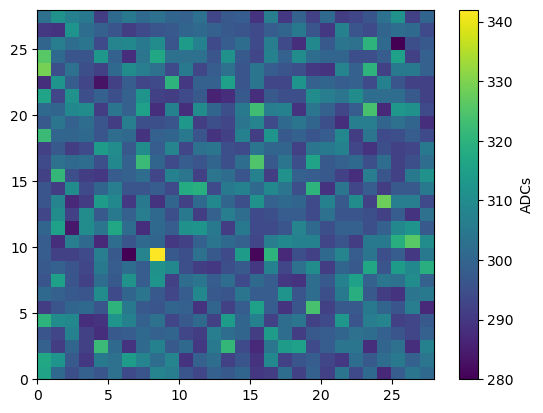

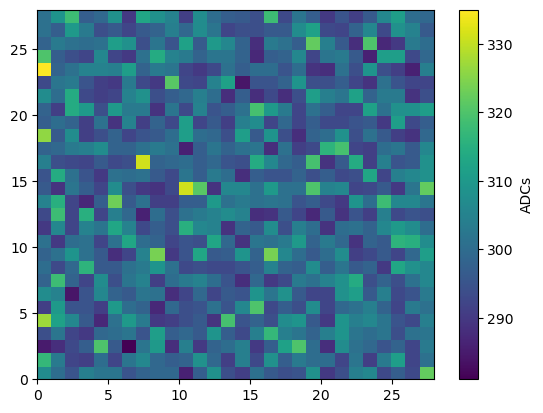

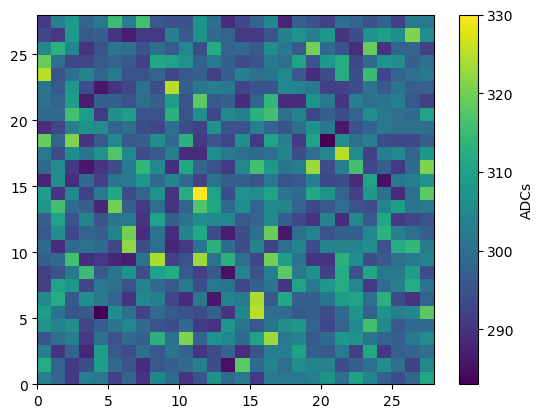

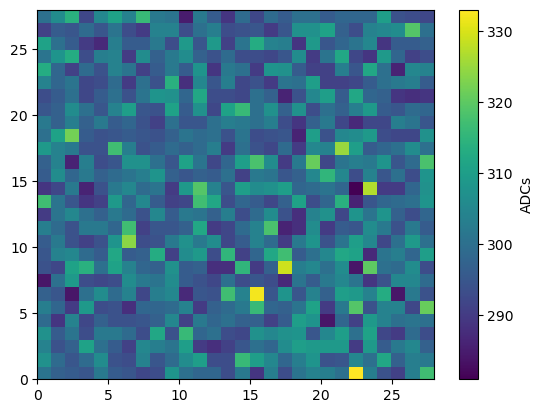

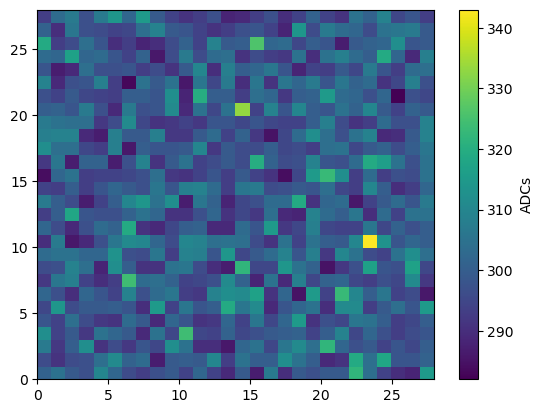

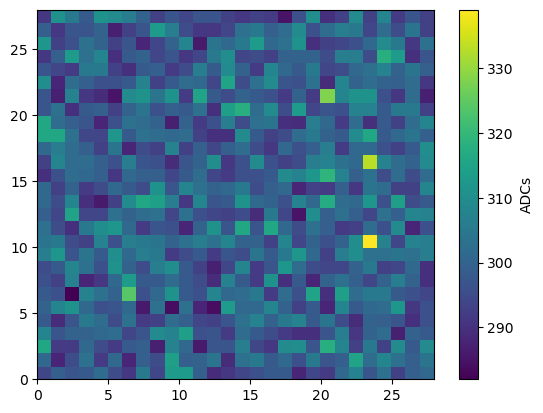

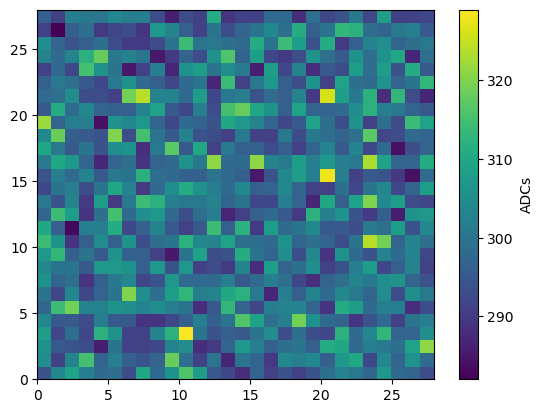

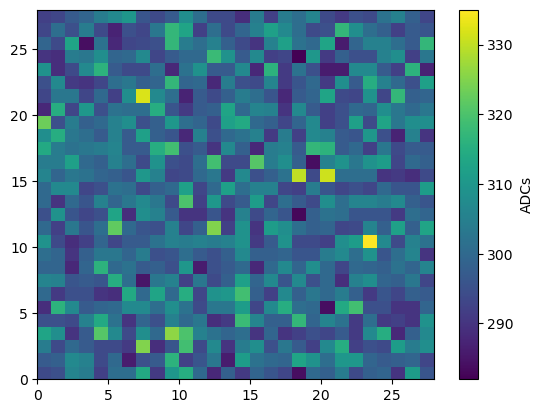

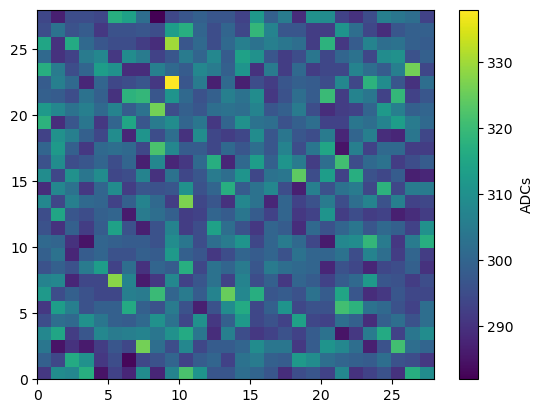

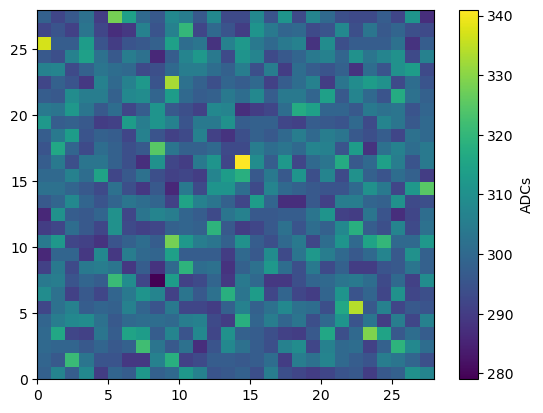

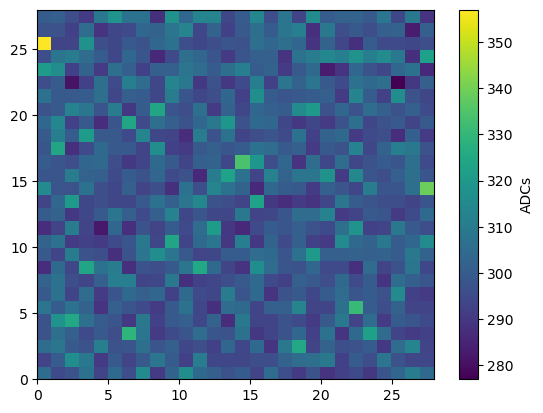

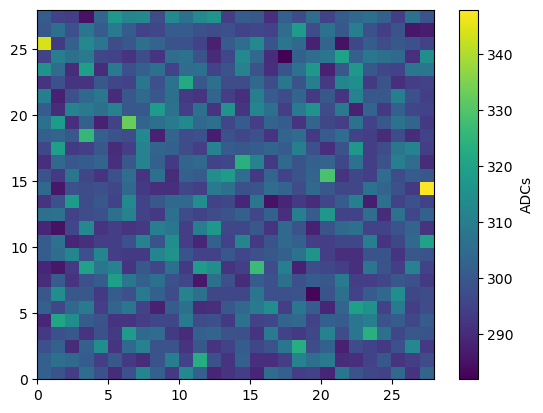

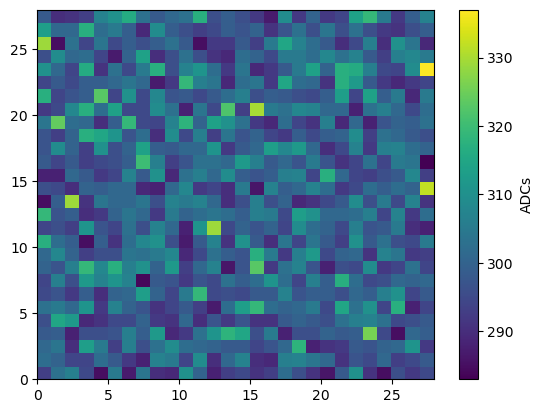

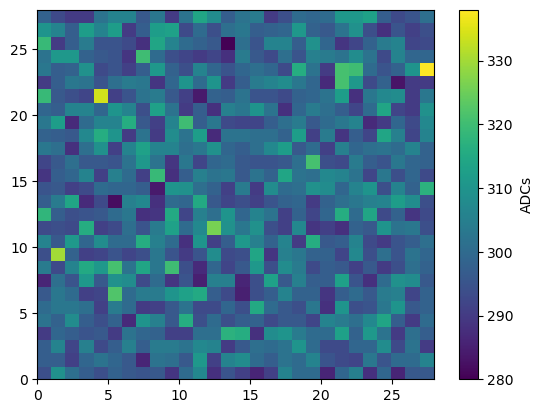

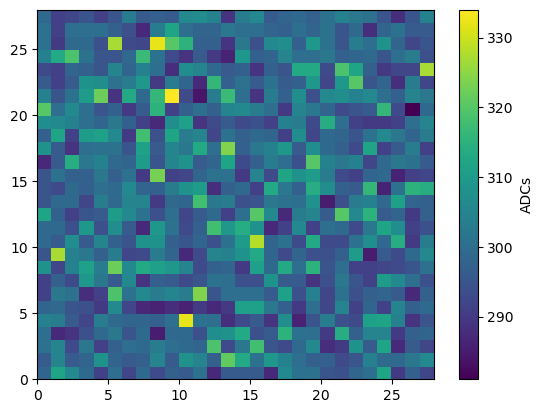

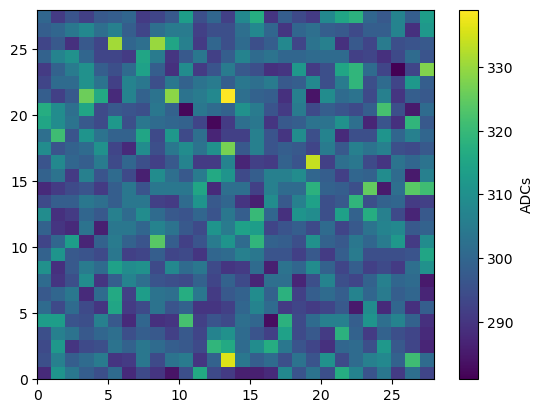

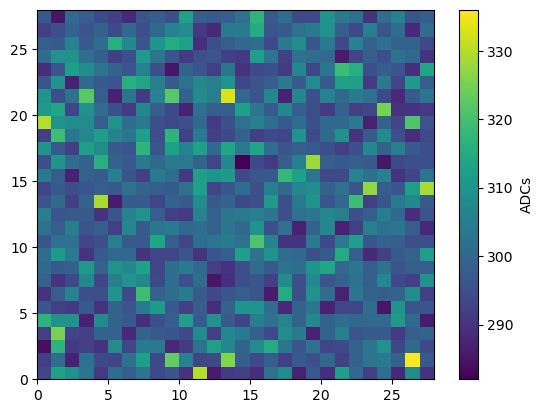

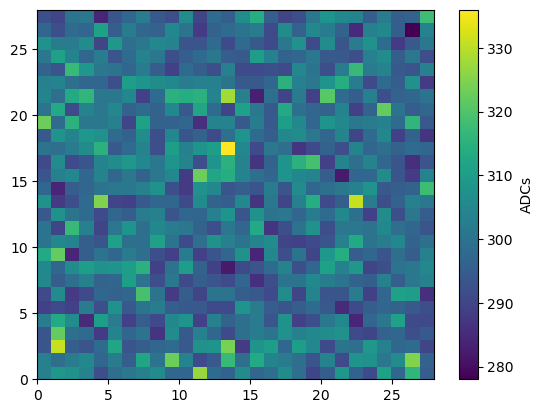

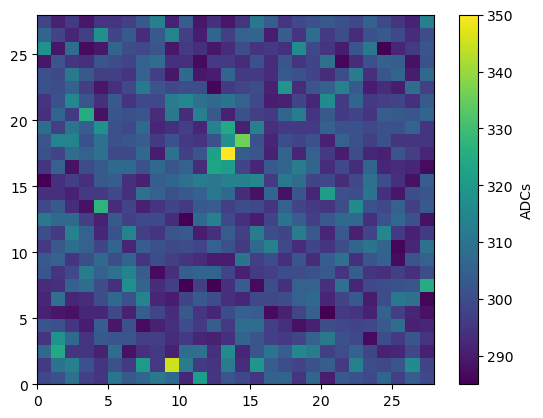

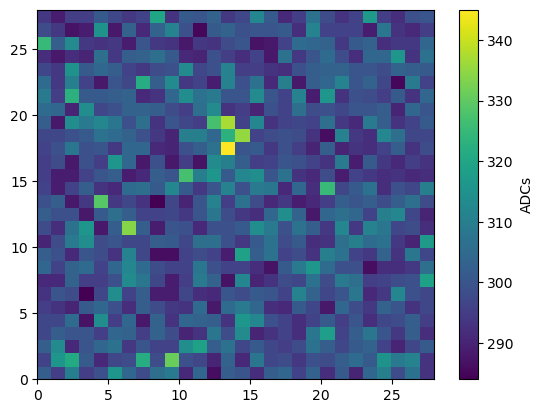

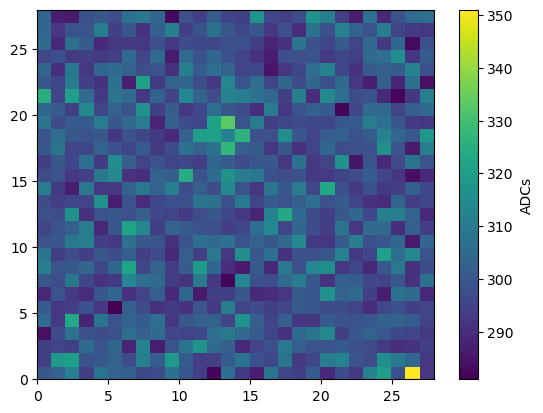

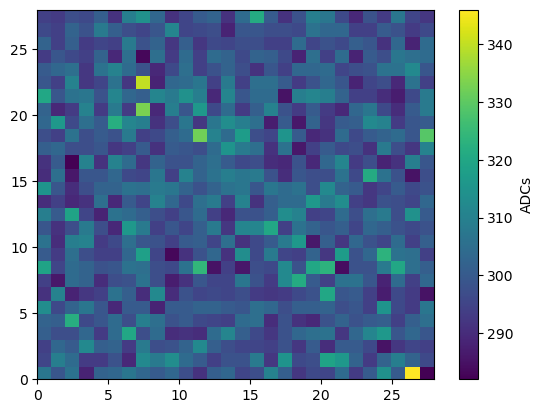

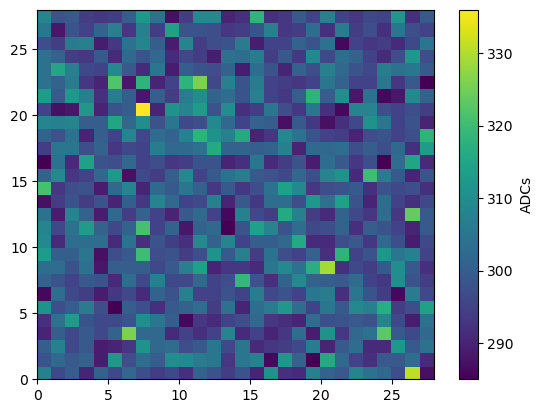

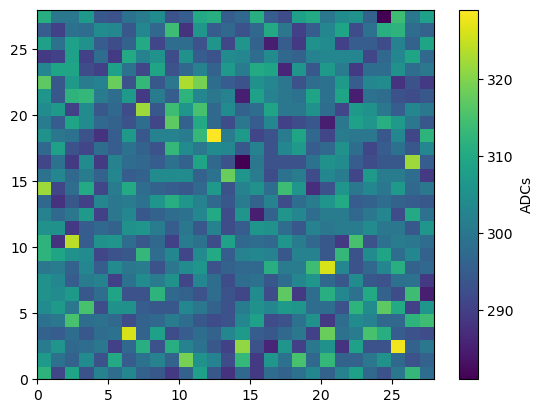

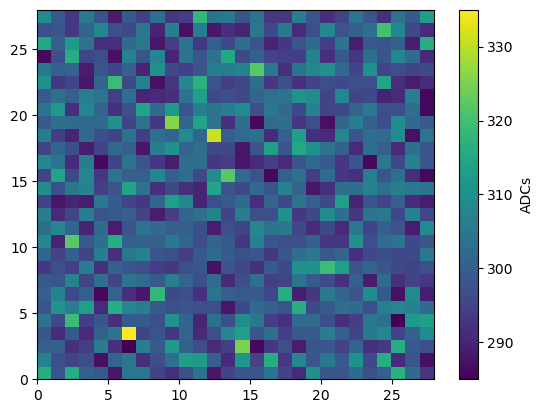

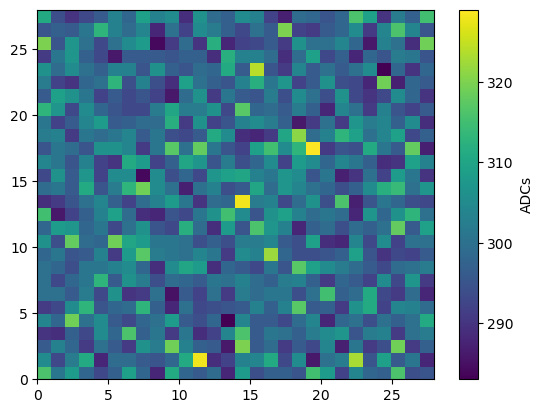

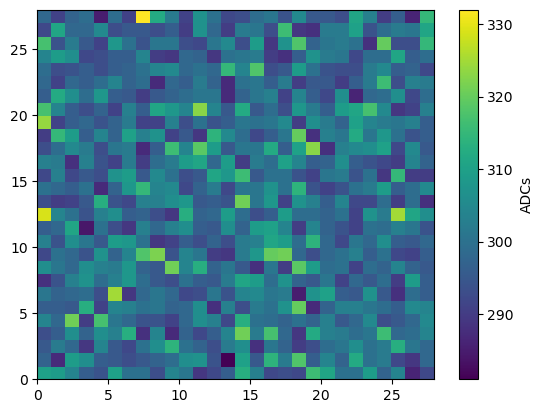

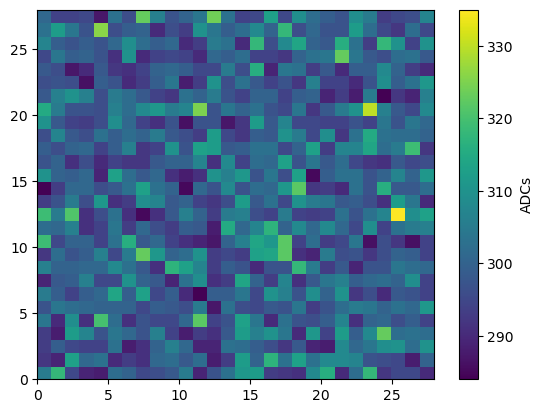

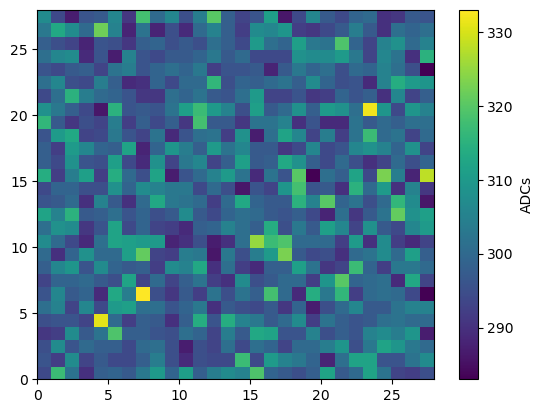

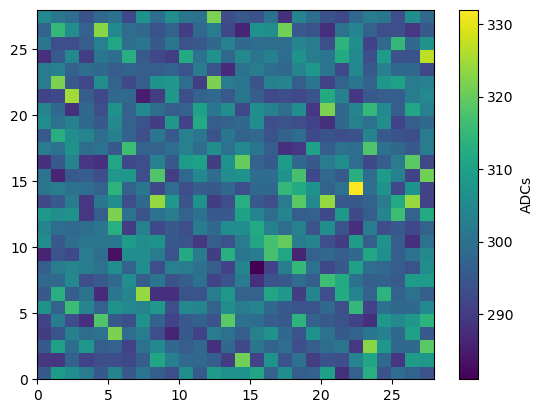

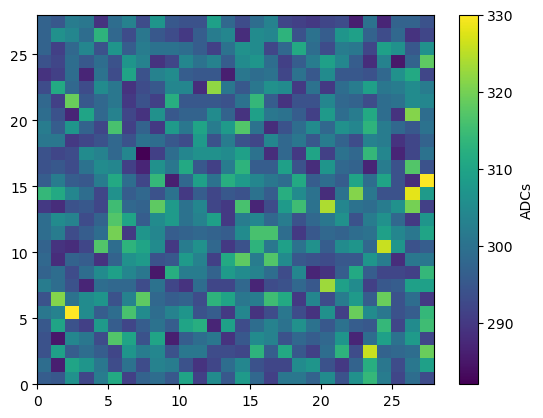

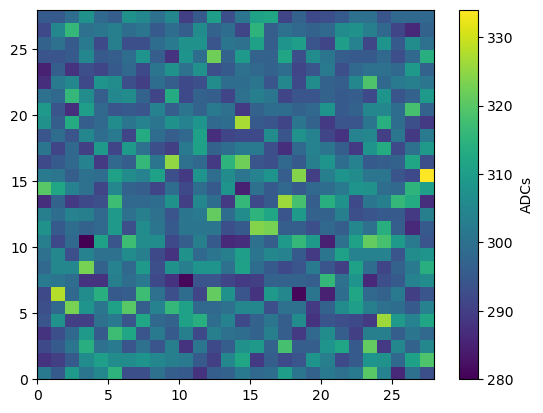

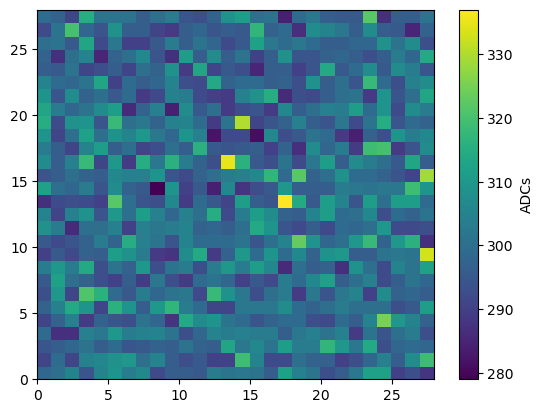

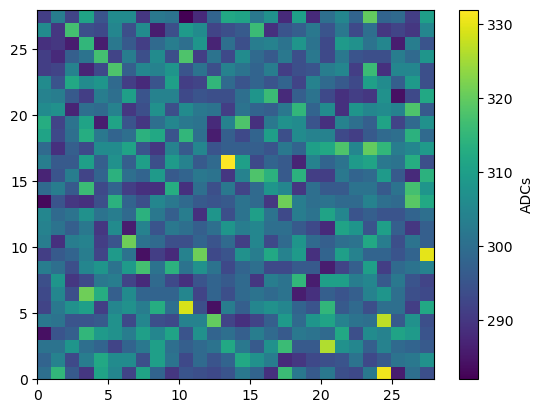

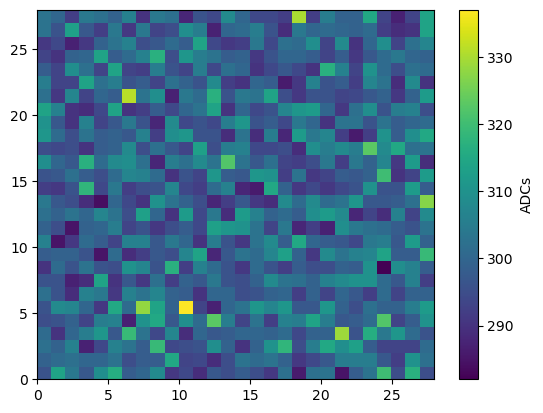

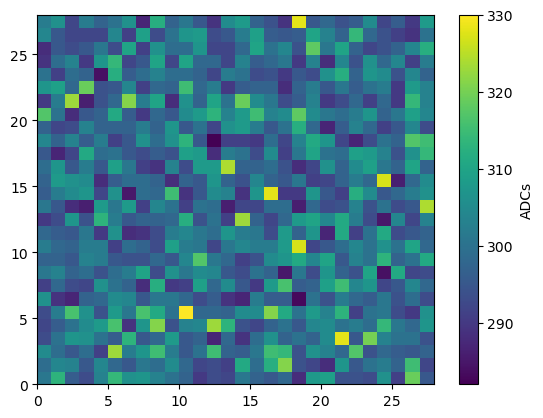

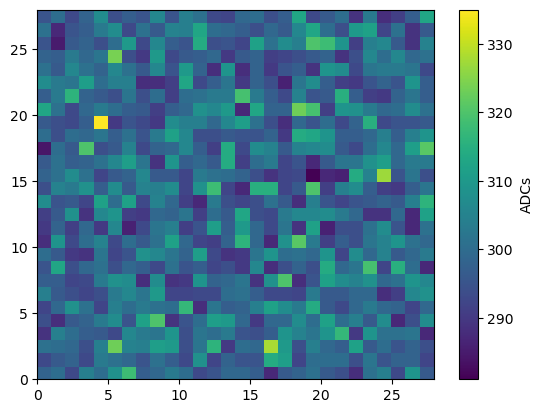

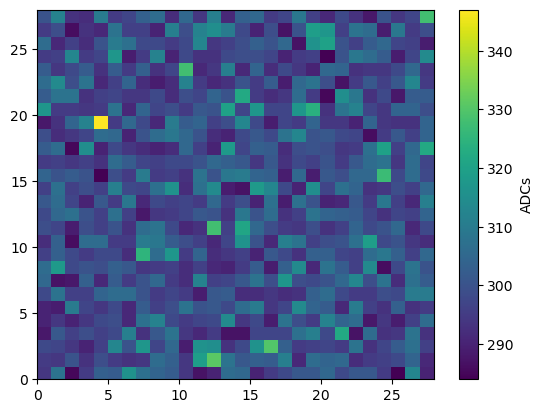

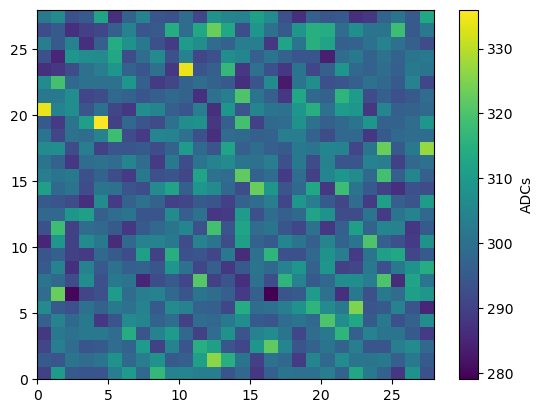

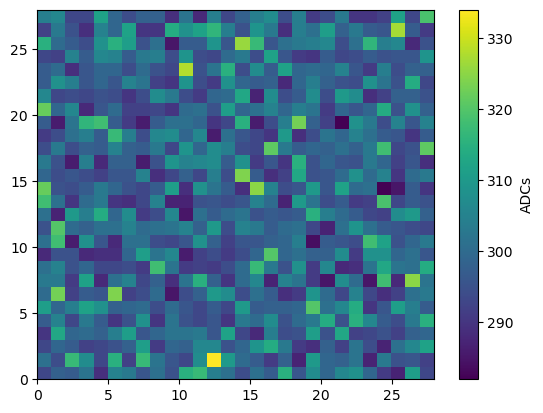

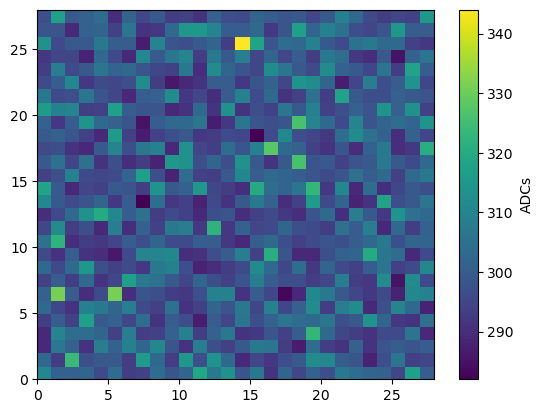

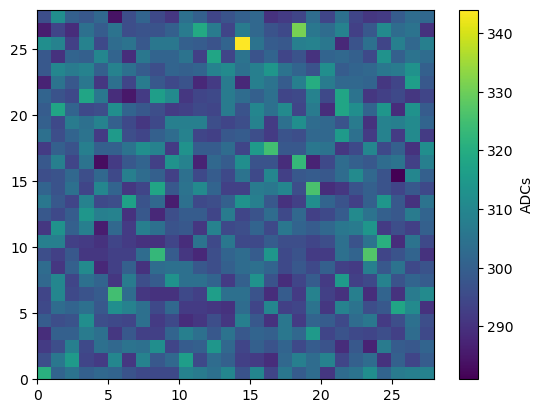

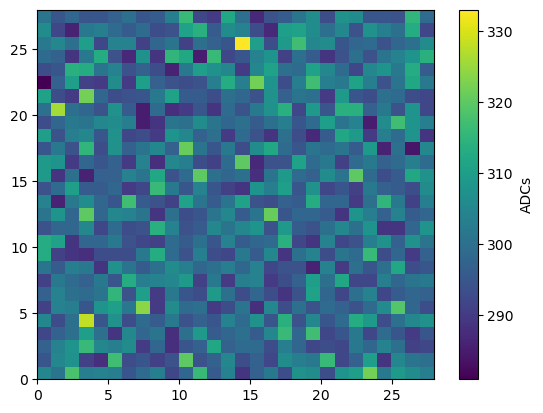

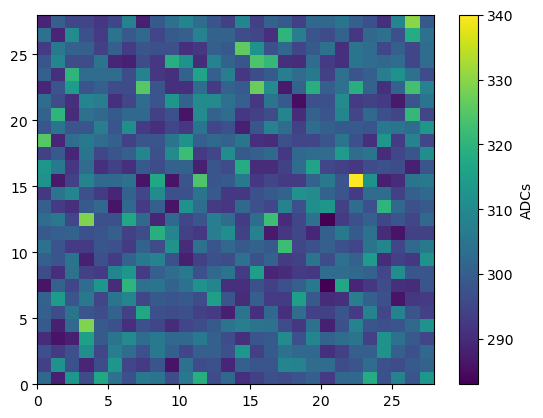

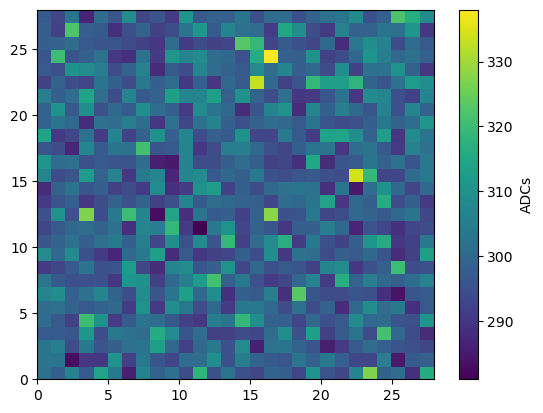

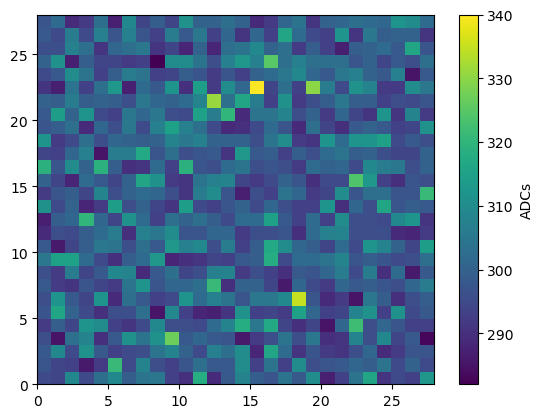

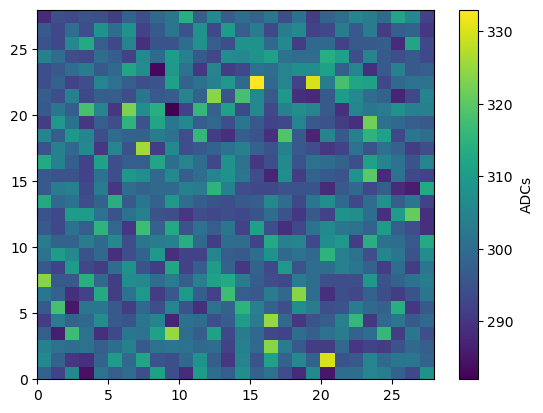

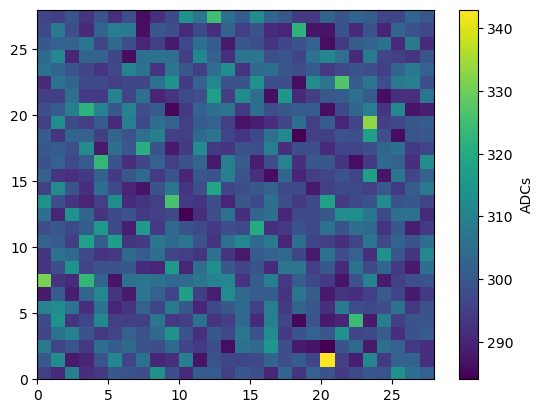

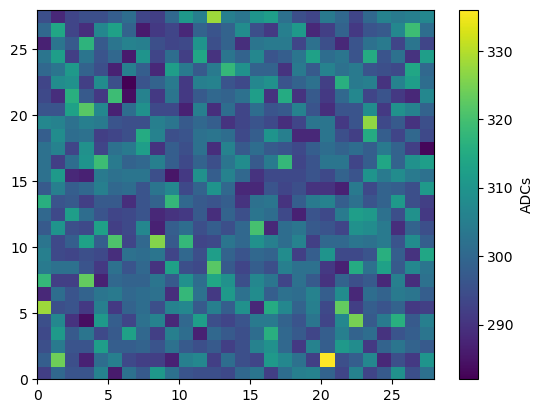

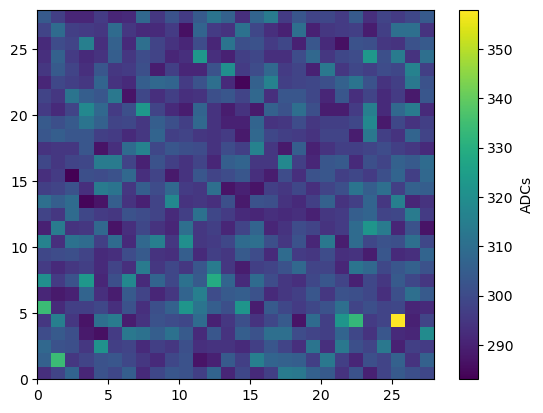

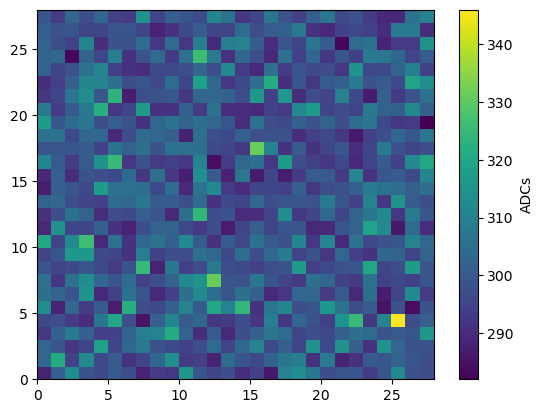

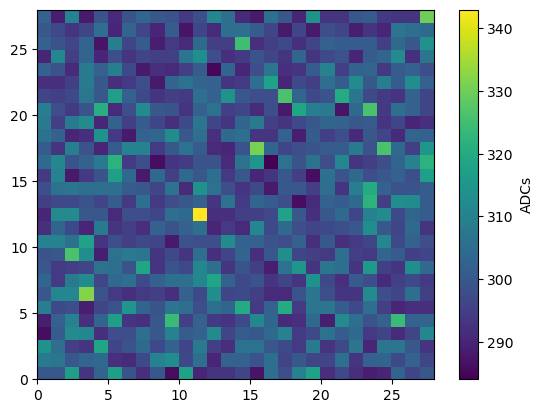

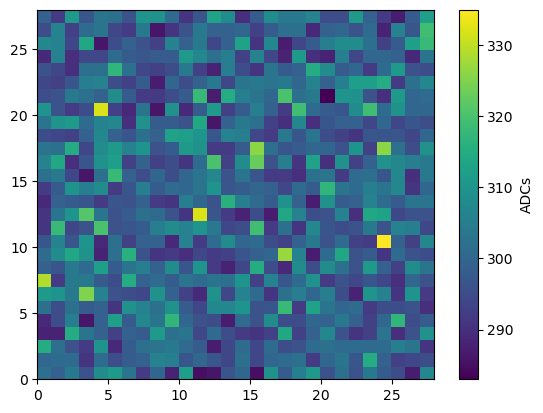

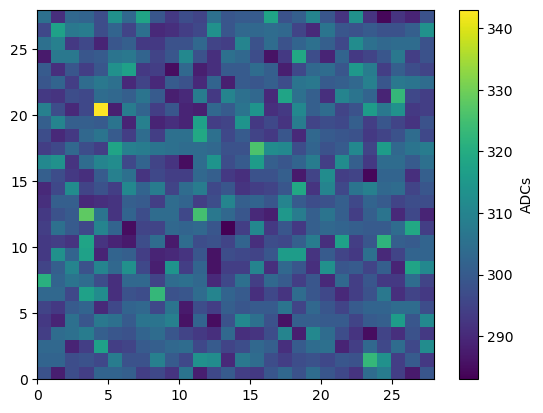

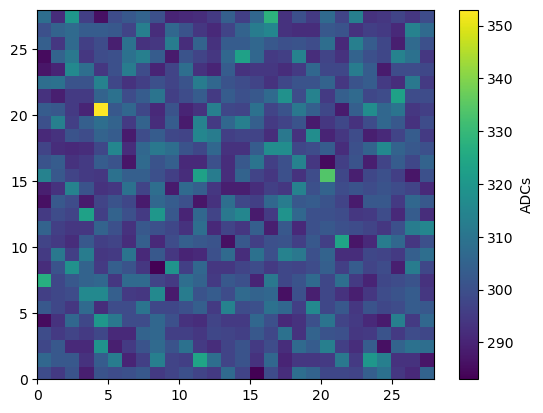

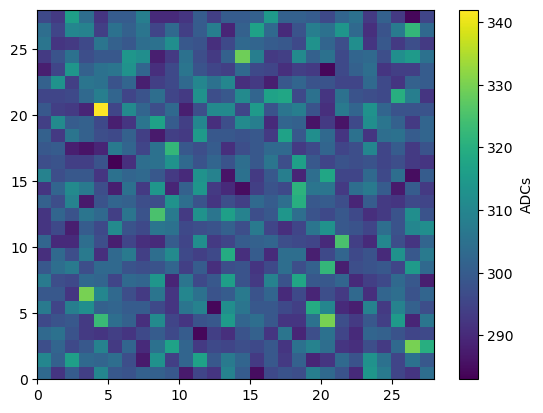

In [15]:
for i in range (0,75):
    plt.figure()
    plt.pcolor(waveform[:,:,i],cmap='viridis')
    plt.colorbar(label="ADCs")
    plt.show()
    plt.close()

# balanced patches

In [8]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "balanced_patches",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0},
                              interleave_patches = True,
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [9]:
reader.example_identifiers

<Table length=266209>
index  file_index table_index ...   log_true_energy   true_shower_primary_class
                              ...         TeV                                  
int64    int64       int64    ...       float64                 int64          
------ ---------- ----------- ... ------------------- -------------------------
     0          0           0 ... -1.9925999642324606                         1
     1          0           0 ... -1.9925999642324606                         1
     2          0           0 ... -1.9925999642324606                         1
     3          0           0 ... -1.9925999642324606                         1
     4          0           0 ... -1.9925999642324606                         1
     5          0           0 ... -1.9925999642324606                         1
     6          0           0 ... -1.9925999642324606                         1
     7          0           0 ... -1.9925999642324606                         1
     8          0           0 ... -1.9925999642324606                         1
   ...        ...         ... ...                 ...                       ...
266200          0       11043 ...  -0.869229201033562                         1
266201          0       11043 ...  -0.869229201033562                         1
266202          0       11043 ...  -0.869229201033562                         1
266203          0       11043 ...  -0.869229201033562                         1
266204          0       11043 ...  -0.869229201033562                         1
266205          0       11043 ...  -0.869229201033562                         1
266206          0       11043 ...  -0.869229201033562                         1
266207          0       11043 ...  -0.869229201033562                         1
266208          0       11043 ...  -0.869229201033562                         1

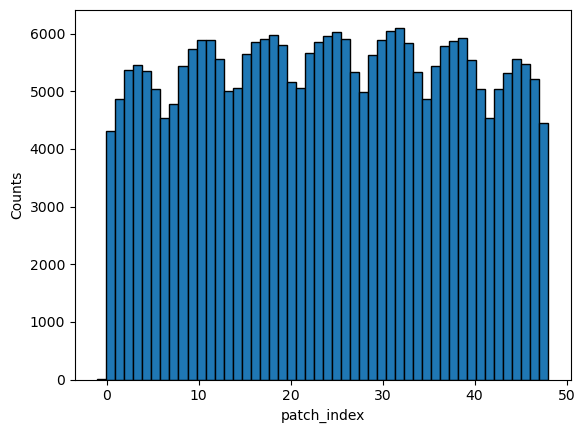

In [11]:
patches = reader.example_identifiers["patch_index"]
plt.hist(patches, bins=50, edgecolor="black")
plt.xlabel("patch_index")
plt.ylabel("Counts")
plt.show()

In [18]:
reader.generate_mono_batch(batch_indices=list(range(8)))

<Table length=8>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ... -1.9925999642324606                         1
    1          0           0 ... -1.9925999642324606                         1
    2          0           0 ... -1.9925999642324606                         1
    3          0           0 ... -1.9925999642324606                         1
    4          0           0 ... -1.9925999642324606                         1
    5          0           0 ... -1.9925999642324606                         1
    6          0           0 ... -1.9925999642324606                         1
    7          0           0 ... -1.9925999642324606                         1

# All patches

In [19]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = False,
                              trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [20]:
reader.example_identifiers

<Table length=541156>
index  file_index table_index ...   log_true_energy   true_shower_primary_class
                              ...         TeV                                  
int64    int64       int64    ...       float64                 int64          
------ ---------- ----------- ... ------------------- -------------------------
     0          0           0 ... -1.9925999642324606                         1
     1          0           0 ... -1.9925999642324606                         1
     2          0           0 ... -1.9925999642324606                         1
     3          0           0 ... -1.9925999642324606                         1
     4          0           0 ... -1.9925999642324606                         1
     5          0           0 ... -1.9925999642324606                         1
     6          0           0 ... -1.9925999642324606                         1
     7          0           0 ... -1.9925999642324606                         1
     8          0           0 ... -1.9925999642324606                         1
   ...        ...         ... ...                 ...                       ...
541147          0       11043 ...  -0.869229201033562                         1
541148          0       11043 ...  -0.869229201033562                         1
541149          0       11043 ...  -0.869229201033562                         1
541150          0       11043 ...  -0.869229201033562                         1
541151          0       11043 ...  -0.869229201033562                         1
541152          0       11043 ...  -0.869229201033562                         1
541153          0       11043 ...  -0.869229201033562                         1
541154          0       11043 ...  -0.869229201033562                         1
541155          0       11043 ...  -0.869229201033562                         1

In [22]:
reader.generate_mono_batch(batch_indices=list(np.arange(50)))

<Table length=50>
index file_index table_index ...   log_true_energy   true_shower_primary_class
                             ...         TeV                                  
int64   int64       int64    ...       float64                 int64          
----- ---------- ----------- ... ------------------- -------------------------
    0          0           0 ... -1.9925999642324606                         1
    1          0           0 ... -1.9925999642324606                         1
    2          0           0 ... -1.9925999642324606                         1
    3          0           0 ... -1.9925999642324606                         1
    4          0           0 ... -1.9925999642324606                         1
    5          0           0 ... -1.9925999642324606                         1
    6          0           0 ... -1.9925999642324606                         1
    7          0           0 ... -1.9925999642324606                         1
    8          0           0 ... -1.9925999642324606                         1
  ...        ...         ... ...                 ...                       ...
   41          0           0 ... -1.9925999642324606                         1
   42          0           0 ... -1.9925999642324606                         1
   43          0           0 ... -1.9925999642324606                         1
   44          0           0 ... -1.9925999642324606                         1
   45          0           0 ... -1.9925999642324606                         1
   46          0           0 ... -1.9925999642324606                         1
   47          0           0 ... -1.9925999642324606                         1
   48          0           0 ... -1.9925999642324606                         1
   49          0           1 ... -1.4897898175306203                         1

## Double random


In [23]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum",
                              output_settings = "double_random",
                              hot_pixel_from_simulation = False,
                              trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [24]:
reader.example_identifiers

<Table length=22088>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           0 ...  -1.9925999642324606                         1
    2          0           1 ...  -1.4897898175306203                         1
    3          0           1 ...  -1.4897898175306203                         1
    4          0           2 ... -0.42745453697254265                         1
    5          0           2 ... -0.42745453697254265                         1
    6          0           3 ...   -1.800087774779224                         1
    7          0           3 ...   -1.800087774779224                         1
    8          0           4 ...   -1.800087774779224                         1
  ...        ...         ... ...                  ...                       ...
22079          0       11039 ...  -1.3769667552339369                         1
22080          0       11040 ...  -1.3769667552339369                         1
22081          0       11040 ...  -1.3769667552339369                         1
22082          0       11041 ...  -0.8095704438545192                         1
22083          0       11041 ...  -0.8095704438545192                         1
22084          0       11042 ...  -0.8095704438545192                         1
22085          0       11042 ...  -0.8095704438545192                         1
22086          0       11043 ...   -0.869229201033562                         1
22087          0       11043 ...   -0.869229201033562                         1

In [25]:
batch = reader.generate_mono_batch(batch_indices=np.arange(20))
batch

<Table length=20>
index file_index table_index ...   log_true_energy    true_shower_primary_class
                             ...         TeV                                   
int64   int64       int64    ...       float64                  int64          
----- ---------- ----------- ... -------------------- -------------------------
    0          0           0 ...  -1.9925999642324606                         1
    1          0           0 ...  -1.9925999642324606                         1
    2          0           1 ...  -1.4897898175306203                         1
    3          0           1 ...  -1.4897898175306203                         1
    4          0           2 ... -0.42745453697254265                         1
    5          0           2 ... -0.42745453697254265                         1
    6          0           3 ...   -1.800087774779224                         1
    7          0           3 ...   -1.800087774779224                         1
    8          0           4 ...   -1.800087774779224                         1
    9          0           4 ...   -1.800087774779224                         1
   10          0           5 ...  -0.8830110313976508                         1
   11          0           5 ...  -0.8830110313976508                         1
   12          0           6 ...  -0.8830110313976508                         1
   13          0           6 ...  -0.8830110313976508                         1
   14          0           7 ...   -1.481803772036002                         1
   15          0           7 ...   -1.481803772036002                         1
   16          0           8 ...   -1.481803772036002                         1
   17          0           8 ...   -1.481803772036002                         1
   18          0           9 ...  -1.0579509455393845                         1
   19          0           9 ...  -1.0579509455393845                         1

# Verify the data 

In [28]:
source = EventSource("/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5")
# event.simulation.tel[1].true_image.shape

Table /r1/event/telescope/tel_001 is missing column first_cell_id for field first_cell_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column module_hires_local_clock_counter for field module_hires_local_clock_counter of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column pedestal_intensity for field pedestal_intensity of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column calibration_monitoring_id for field calibration_monitoring_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.


Event index: 502
True cherenkov p.e.: 74


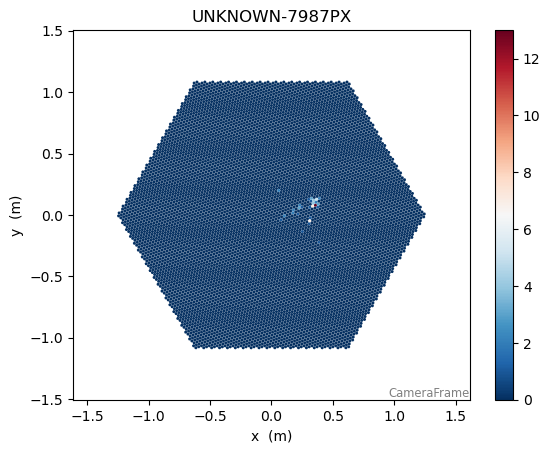

Event index: 1903
True cherenkov p.e.: 53


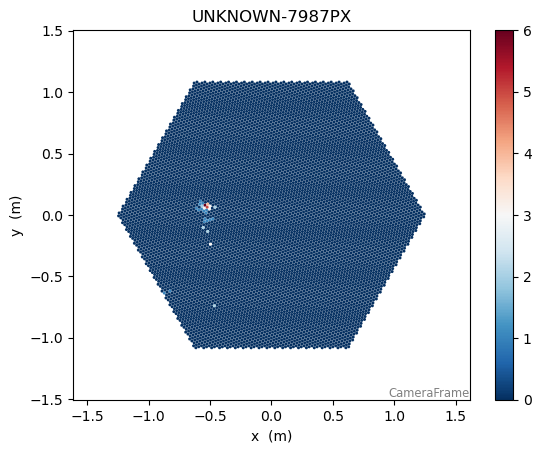

Event index: 3101
True cherenkov p.e.: 43


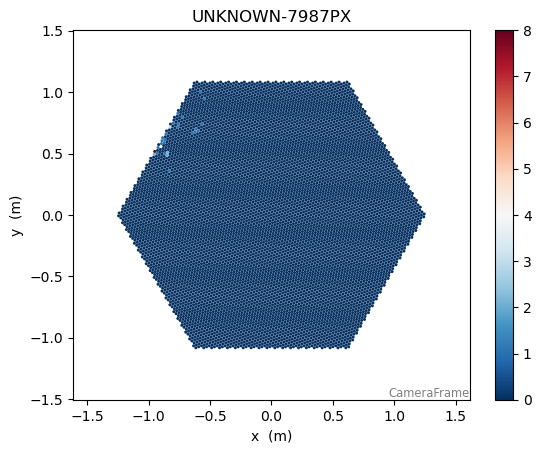

Event index: 3305
True cherenkov p.e.: 44


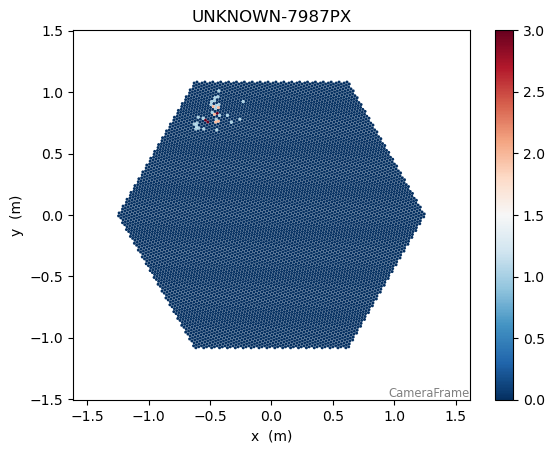

Event index: 3307
True cherenkov p.e.: 37


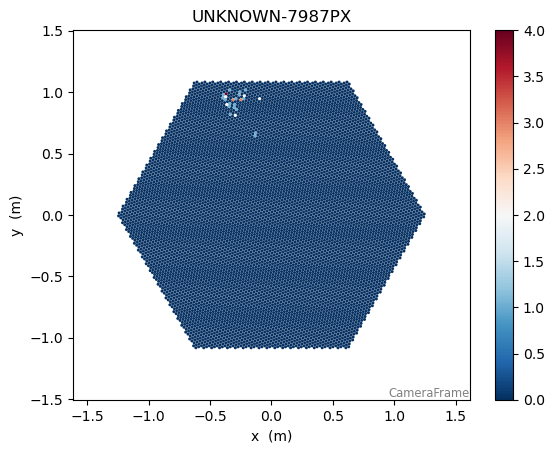

Event index: 3700
True cherenkov p.e.: 233


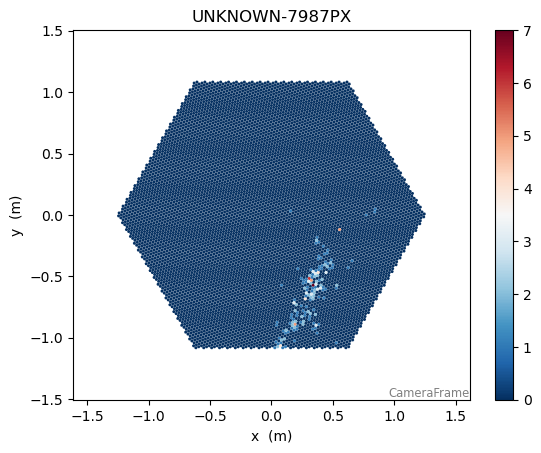

Event index: 3701
True cherenkov p.e.: 184


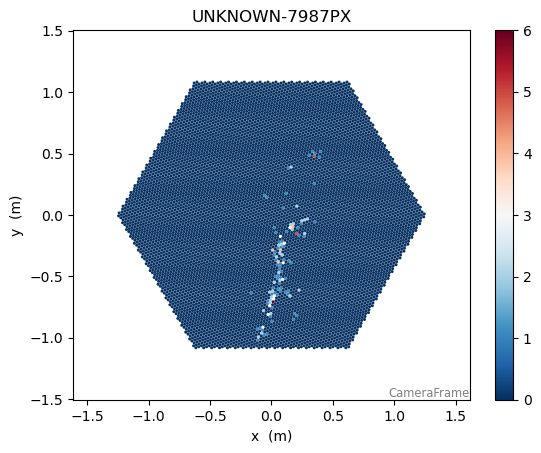

Event index: 5900
True cherenkov p.e.: 20


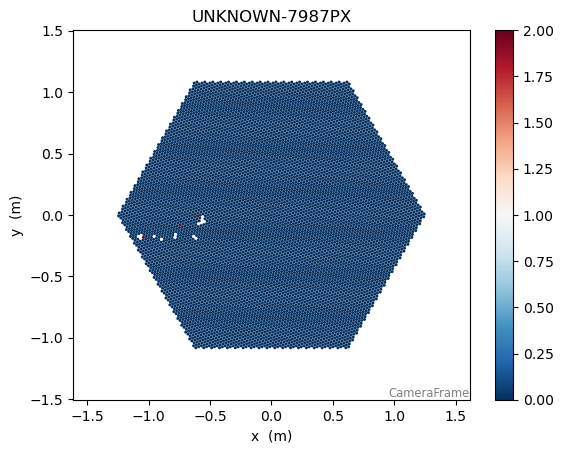

Event index: 5909
True cherenkov p.e.: 39


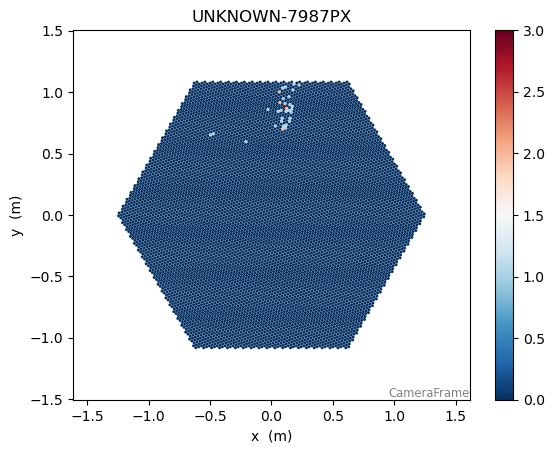

Event index: 6403
True cherenkov p.e.: 36


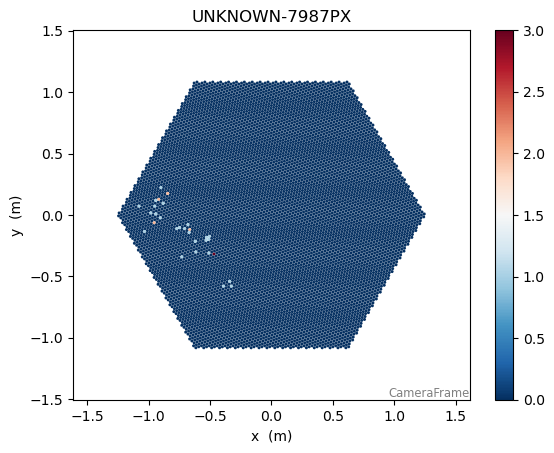

In [29]:
camgeo = source.subarray.tel[1].camera.geometry
for event in source:
    if event.count < 10:
        print(f"Event index: {event.index.event_id}")
        print(f"True cherenkov p.e.: {event.simulation.tel[1].true_image_sum}")
        disp = CameraDisplay(source.subarray.tel[1].camera.geometry)
        #disp.image = event.dl1.tel[1].image
        disp.image = event.simulation.tel[1].true_image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        plt.show()
    else: break

In [30]:
chkov = []
for event in source:
    chkov.append(event.simulation.tel[1].true_image_sum)

plt.hist(chkov, bins=50, edgecolor="black")
plt.xlabel("Detected Cherenkov p.e.")
plt.ylabel("Counts")
plt.title("Cherenkov p.e.")
plt.show()

Table /r1/event/telescope/tel_001 is missing column first_cell_id for field first_cell_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column module_hires_local_clock_counter for field module_hires_local_clock_counter of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column pedestal_intensity for field pedestal_intensity of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.
Table /r1/event/telescope/tel_001 is missing column calibration_monitoring_id for field calibration_monitoring_id of container <class 'ctapipe.containers.R1CameraContainer'>. It will be skipped.


KeyboardInterrupt: 

In [ ]:
event.simulation.shower.keys()
event.simulation.shower.core_x

In [ ]:

def distance(event):
    x = event.simulation.shower.core_x
    y = event.simulation.shower.core_y
    d = np.sqrt(x**2+y**2)
    return d
    

In [ ]:
far = 0
near = 0
distances = []
for event in source:
    d = distance(event).to_value()
    if d >= 300:
        far+=1
    else:
        near+=1
    distances.append(d)

print(f"{far} events further than 300 m")
print(f"{near} events nearer than 300 m")

plt.hist(distances, bins=50, edgecolor="black")
plt.xlabel("Distance (m)")
plt.ylabel("Frequency")
plt.title("Histogram of Distances")
plt.show()